In [1]:
import numpy as np
from Agent import sinDQNAgent
import matplotlib.pyplot as plt
import torch
import math
from torch.autograd import Variable

In [2]:
def mkDataSet(data_size, data_length=50, freq=60.):
    train_x = []
    train_t = []

    for offset in range(data_size):
        train_x.append([[math.sin(2*math.pi*(offset+i)/freq)+np.random.normal(loc=0.0, scale=0.015)] for i in range(data_length)])
        train_t.append([math.sin(2*math.pi*(offset+data_length)/freq)])

    return train_x, train_t #train_x=(data_size, data_length, 1), train_t=(data_size, 1)

training_size = 500
data_length=50
epoch_num = 100

In [3]:
agent = sinDQNAgent('crnn', data_length)
sync_interval = 10
reward_history = []
loss_history = []

In [4]:
for epoch in range(epoch_num):
    total_reward = 0
    train_x, train_t = mkDataSet(training_size)
    for ep in range(training_size-1):
        state = torch.tensor([train_x[ep]])
        done = False

        action = agent.get_action(state)
        next_state = torch.tensor([train_x[ep+1]])

        if action == 0:
            reward = next_state[0][-1] - state[0][-1]
        else:
            reward = 0.

        total_reward += reward

        reward = torch.tensor(reward)
        loss = agent.update(state, action, reward, next_state)
        loss_history.append(loss)

        state = next_state

        if ep % sync_interval == 0:
            agent.sync_qnet()

    reward_history.append(total_reward)

#    if epoch % 10 ==0:
    print(epoch)

/tmp/ipykernel_3508031/2450127894.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reward = torch.tensor(reward)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


/tmp/ipykernel_3508031/1699147253.py:4: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ax.plot(np.array(reward_history), color = "r")
/tmp/ipykernel_3508031/1699147253.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ax.plot(np.array(reward_history), color = "r")


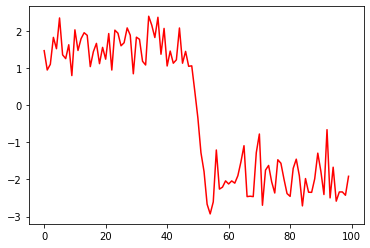

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.array(reward_history), color = "r")

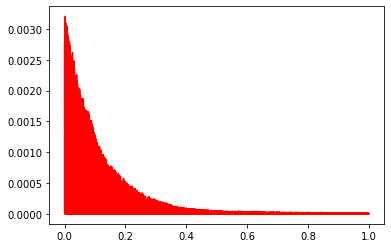

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 1, len(loss_history))
ax.plot(x, loss_history, color = "r")